<a href="https://colab.research.google.com/github/arzaqulhusna/Data-Project/blob/master/Machine_Learning_With_Python_for_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**
Machine Learning adalah teknik dimana komputer dapat mengekstraksi atau mempelajari pola dari suatu data, kemudian dengan pola yang telah dipelajari dari data historis, komputer mampu mengenali dan memprediksi trend, hasil atau kejadian di masa mendatang atau dari observasi baru tanpa perlu diprogram secara eksplisit.
Penggunaan machine learning lainnya, seperti memprediksi harga saham, pengenalan wajah (face recognition), mengenali tulisan tangan, mendeteksi fraud/scam kartu kredit, memprediksi cuaca, dan memprediksi permintaan barang

# **Terminologi Machine Learning**
Dalam pembuatan model machine learning tentunya dibutuhkan data. Sekumpulan data yang digunakan dalam machine learning disebut **dataset**, yang kemudian dibagi/di-split menjadi training dataset dan test dataset.

**Training dataset** digunakan untuk membuat/melatih model machine learning, sedangkan **test dataset** digunakan untuk menguji performa/akurasi dari model yang telah dilatih/di-training.

Teknik atau pendekatan yang digunakan untuk membangun model disebut **Algorithm** seperti Decision Tree, K-NN, Linear Regression, Random Forest, dsb. dan output atau hasil dari proses melatih algorithm dengan suatu dataset disebut **Model**.

Umumnya dataset disajikan dalam bentuk tabel yang terdiri dari baris dan kolom. Bagian Kolom adalah **Feature/Variabel**  data yang dianalisa, sedangkan bagian baris adalah **Data point/Observation/Example**.

Hal yang menjadi target prediksi atau hal yang akan diprediksi dalam machine learning disebut **Label/Class/Target**. Dalam statistika/matematika, Label/Class/Target ini dinamakan dengan Dependent Variabel, dan **Feature** adalah Independent Variabel.

# **Tipe-Tipe Machine Learning**


1.   **Supervised Learning** adalah jika label/Class dari dataset sudah diketahui. Contoh : email spam dan email not spam.  
Jika label dari dataset  berupa numerik atau kontinu variabel seperti harga dan jumlah penjualan menggunakan algorithm **metode regresi** dan jika bukan numerik atau diskrit maka menggunakan algorithm **metode klasifikasi**.
2.   **Unsupervised Learning** adalah jika label/class dari dataset belum diketahui. Contoh: mengelompokkan customer ke dalam beberapa segmentasi berdasarkan variabel-variabel seperti pendapatan, umur, hobi, atau jenis pekerjaan.
Untuk segmentasi customer menggunakan algorithm **metode clustering**.


> **INGAT!** tidak ada machine learning algorithm yang cocok atau fit untuk diaplikasikan di semua problem. Oleh karena itu, proses ini terkadang memerlukan trial & error seperti research, bahkan experienced data scientist pun tidak akan tahu apakah algorithm itu akan tepat atau tidak jika tidak mencoba. Biasanya, data scientist akan mencoba beberapa algorithm dan membandingkan performansi dari algorithm - algorithm tersebut. Algorithm dengan performansi yang paling baiklah yang dipilih sebagai model,





# **Tahap-tahap pembuatan model machine learning**





## **Eksplorasi Data**

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

###**Korelasi** 
Kemudian juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity). Jadi, jika ketika sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree.

In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

### **Distribusi Label**
Mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan

### **Visualisasi**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


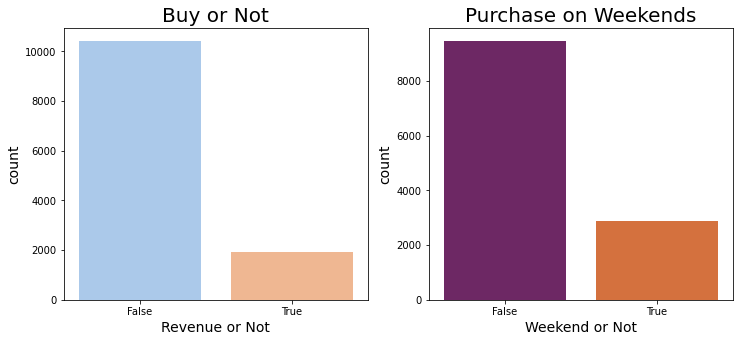

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or Not', fontsize = 14) 
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or Not', fontsize = 14) 
plt.ylabel('count', fontsize = 14)
plt.show()

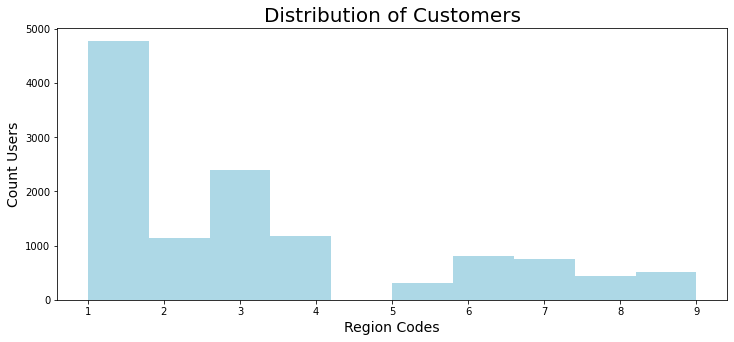

In [ ]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

## **Data Pre-processing**
Raw data belum tentu bisa langsung digunakan untuk pemodelan. Jika pada data memiliki banyak missing value, maka akan mengurangi performansi model dan juga beberapa algorithm machine learning tidak dapat memproses data dengan missing value. Oleh karena itu, perlu mengecek apakah terdapat missing value dalam data atau tidak. Jika tidak, maka kita tidak perlu melakukan apa-apa dan bisa melanjutkan ke tahap berikutnya. Jika ada, maka kita perlu melakukan treatment khusus untuk missing value ini,

### **Handling Missing Value**

In [ ]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


Ternyata ada 112 missing value. Ada beberapa metode untuk menangani missing value, menghapus data adalah salah satunya. Tetapi, metode ini tidak dapat serta merta diimplementasikan. Perlu menganalisis penyebaran missing value, dan berapa persen jumlah missing value dalam data. Metode menghapus data dapat diterapkan jika tidak banyak missing value dalam data, sehingga walaupun data point ini dihapus, kita masih memiliki sejumlah data yang cukup untuk melatih model Machine Learning. Tetapi jika kita memiliki banyak missing value dan tersebar di setiap variabel, maka metode menghapus missing value tidak dapat digunakan. Kita akan kehilangan sejumlah data yang tentunya mempengaruhi performansi model. Kita bisa menghapus data point yang memiliki missing value dengan fungsi .dropna( ) dari pandas library. Fungsi dropna( ) akan menghapus data point atau baris yang memiliki missing value.

In [ ]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


Selain penghapusan data, bisa menggunakan metode impute missing value, yaitu mengisi record yang hilang ini dengan suatu nilai. Ada berbagai teknik dalam metode imputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model. Untuk kasus ini, kita akan menggunakan imputing sederhana yaitu menggunakan nilai rataan atau mean

In [ ]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

### **Scaling**
Rentang nilai dari setiap feature cukup bervariasi. Misalnya, ProductRelated_Duration vs BounceRates.  ProductRelated_Duration memiliki rentang nilai mulai dari 0 - 5000; sedangkan BounceRates rentang nilainya 0 - 1.
Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.
Rumus dari Scaling:


In [ ]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled (karena hanya bisa dilakukan untuk feature dengan tipe numerik) 
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


### **Konversi string ke numerik**
Ada dua kolom yang bertipe object yang dinyatakan dalam tipe data str, yaitu kolom 'Month' dan 'VisitorType'. Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


Bisa dilihat bahwa LabelEncoder akan mengurutkan label secara otomatis secara alfabetik, posisi/indeks dari setiap label ini digunakan sebagai nilai numeris konversi pandas objek ke numeris (dalam hal ini tipe data int). Dengan demikian kita telah membuat dataset kita menjadi dataset bernilai numeris seluruhnya yang siap digunakan untuk pemodelan dengan algoritma machine learning tertentu

## **Pemodelan dengan Scikit-learn**
Scikit-learn adalah library untuk machine learning bagi para pengguna python yang memungkinkan kita melakukan berbagai pekerjaan dalam Data Science, seperti regresi (regression), klasifikasi (classification), pengelompokkan/penggugusan (clustering), data preprocessing, dimensionality reduction, dan model selection (pembandingan, validasi, dan pemilihan parameter maupun model).

### **Features and Label**
Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.

In [ ]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y =dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


### **Training and Test Dataset**
Sebelum melatih model dengan suatu algorithm machine, dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing.
Perbandingan lain yang biasanya digunakan adalah 75:25. Hal penting yang perlu diketahui adalah scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array. Tetapi tidak perlu khawatir, fungsi train_test_split( ) dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array. 
Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test: (2466, 17)
Shape of y_test: (2466,)


### **Training Model: Fit**
Sekarang saatnya melatih model atau training. Dengan Scikit-Learn, proses ini menjadi sangat sederhana. Cukup memanggil nama algorithm yang akan digunakan, biasanya disebut classifier untuk problem klasifikasi, dan regressor untuk problem regresi.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

### **Training Model: Predict**
Setelah model/classifier terbentuk, selanjutnya menggunakan model ini untuk memprediksi LABEL dari testing dataset (X_test), menggunakan fungsi .predict(). Fungsi ini akan mengembalikan hasil prediksi untuk setiap data point dari X_test dalam bentuk array. Proses ini kita kenal dengan **TESTING**

In [ ]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)




> y_pred sama dengan ukuran y_test


### **Evaluasi Model Performance**
Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda. Sekarang saya akan menjelaskan sedikit metrik apa saja yang umumnya digunakan. Metrik paling sederhana untuk mengecek performansi model adalah accuracy. bisa munculkan dengan fungsi .score( ). Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8613138686131386

Confusion matrix:
[[1885  159]
 [ 183  239]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.57      0.58       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric) maka bisa gunakan Accuracy, tetapi jika tidak seimbang maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

# **Machine Learning Algorithm**

## **Supervised Learning Algorithm**
Sebagai dasar, akan dipelajari beberapa algorithm machine learning yaitu Logistic Regression, dan Decision Tree untuk classification problem, dan Linear regression untuk regression problem.

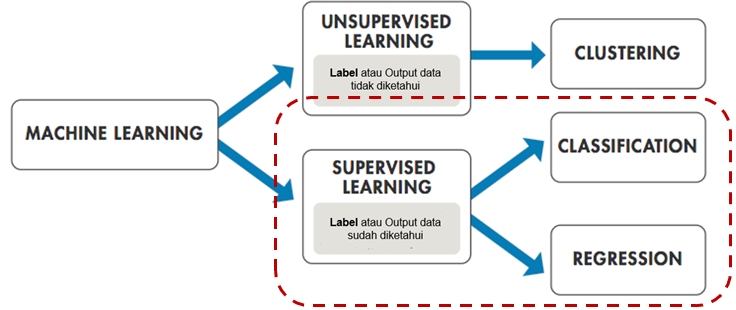

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem. Logistic regression adalah salah satu linear classifier, oleh karena itu, Logistik regression juga menggunakan rumus atau fungsi yang sama seperti linear regression yaitu:

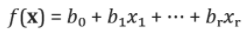

yang disebut Logit, dimana Variabel 𝑏₀, 𝑏₁, …, 𝑏ᵣ adalah koefisien regresi, dan 𝑥₁, …, 𝑥ᵣ adalah explanatory variable/variabel input atau feature.

Output dari Logistic Regression adalah 1 atau 0; sehingga real value dari fungsi logit ini perlu ditransfer ke nilai di antara 1 dan 0 dengan menggunakan fungsi sigmoid.

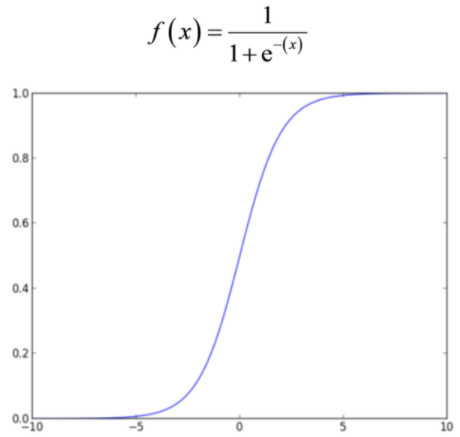

Jadi, jika output dari fungsi sigmoid bernilai lebih dari 0.5, maka data point diklasifikasi ke dalam label/class: 1 atau YES; dan kurang dari 0.5, akan diklasifikasikan ke dalam label/class: 0 atau NO.

> Logistic Regression hanya dapat mengolah data dengan tipe numerik. Pada saat preparasi data, pastikan untuk mengecek tipe variabel yang ada dalam dataset dan pastikan semuanya adalah numerik, lakukan data transformasi jika diperlukan.

### **Logistic Regression**
Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred) 
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8613138686131386

Confusion matrix
[[2011   33]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **Classification - Decision Tree**
Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut :

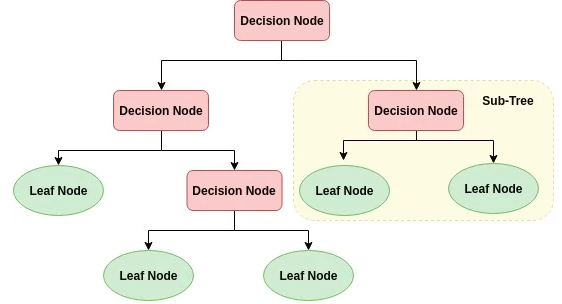

Decision tree terdiri dari :
1. Decision Node yang merupakan feature/input variabel;
2. Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan
3. Leaf yang merupakan output/hasil.

Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :

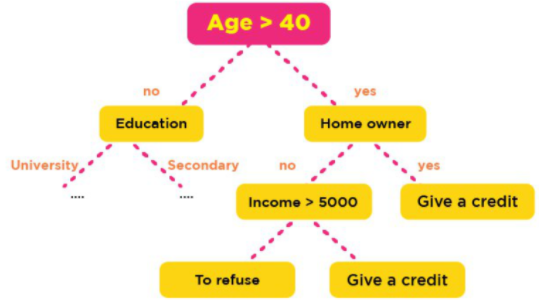

Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

Seperti yang sudah dilakukan dalam prosedur pemodelan machine learning, selanjutnya dapat dengan mudah melakukan pemodelan decision tree dengan menggunakan scikit-learn module, yaitu DecisionTreeClassifier.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train,y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9075425790754258


### **Regression: Linear Regression**
Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

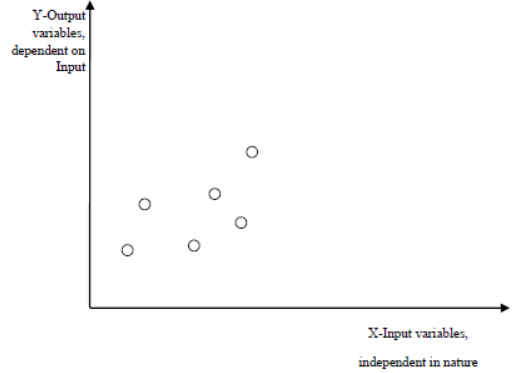

Model regresi terdiri atas 2 tipe yaitu :

1. Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
2. Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).
Adapun model regresi yang paling umum digunakan adalah Linear Regression.

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun). Rumus matematis dari Linear Regression adalah:

image.png

untuk simple linear regression, atau

image.png

untuk multiple linear regression dengan, y adalah target/label, X adalah feature, dan a,b adalah model parameter (intercept dan slope).

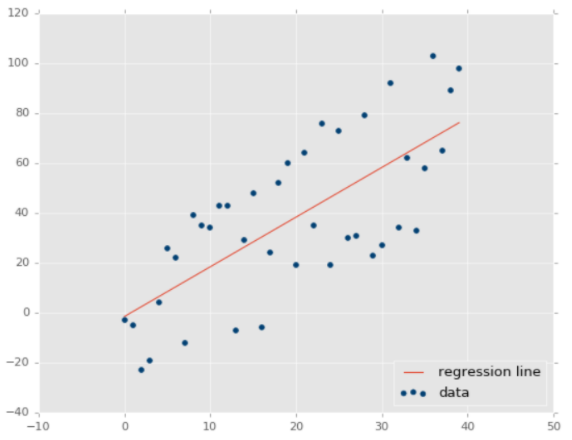

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

1. Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
2. Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
3. Tidak ada autocorrelation dalam data, contohnya pada time-series data.


In [ ]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


### **Regression Performance Evaluation**
Untuk model regression, menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan.

---



**Mean Square Error (MSE)** adalah rata-rata dari squared error: 

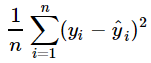

---

**Root Mean Squared Error (RMSE)** adalah akar kuadrat dari MSE:

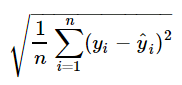

---
**Mean Absolute Error (MAE)** adalah rata-rata dari nilai absolut error:

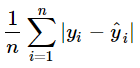


---




Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


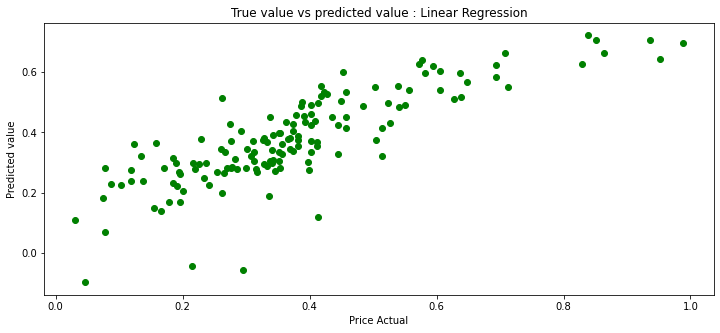

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

## **Unsupervised Learning**
Unsupervised Learning adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain. Contohnya pada gambar berikut:

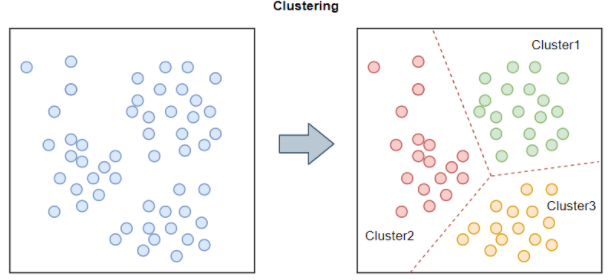

Pada awalnya kita tidak mengetahui bagaimana pola dari objek/sample, termasuk juga tidak mengetahui bagaimana kesamaan maupun perbedaan antara objek yang satu dengan objek yang lain. Setelah dilakukan clustering, baru dapat terlihat bawah objek/sample tersebut dapat dikelompokkan ke dalam 3 kluster. Untuk menjelaskan tentang metode Clustering, kita akan menggunakan metode clustering yang sangat populer, yaitu K-Means Algorithm

### **K-Means Clustering**
K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat. Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski dengan rumus:

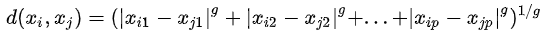

xi , xj adalah dua buah data yang akan dihitung jaraknya, dan p = dimensi/jumlah dari data

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu :

1. Jarak Manhattan di mana g = 1
2. Jarak Euclidean di mana g = 2
3. Jarak Chebychev di mana g = ∞

Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data. 

Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah.

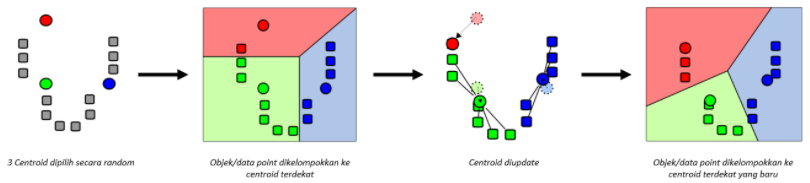

Secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data

In [ ]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

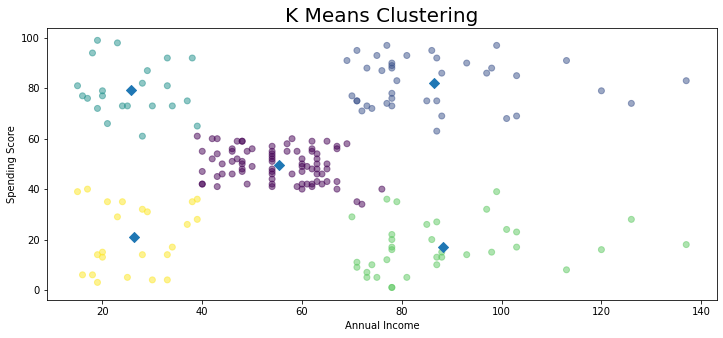

In [ ]:
#inspect and visualizing the cluster
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia.

Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.

Untuk mengetahui nilai K yang paling baik dengan inertia yang paling kecil dengan mencoba beberapa nilai dan memplot nilai inertia-nya. Semakin banyak cluster maka inertia semakin kecil.

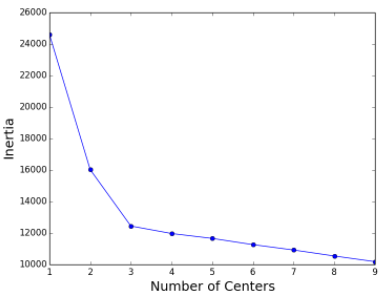

Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.

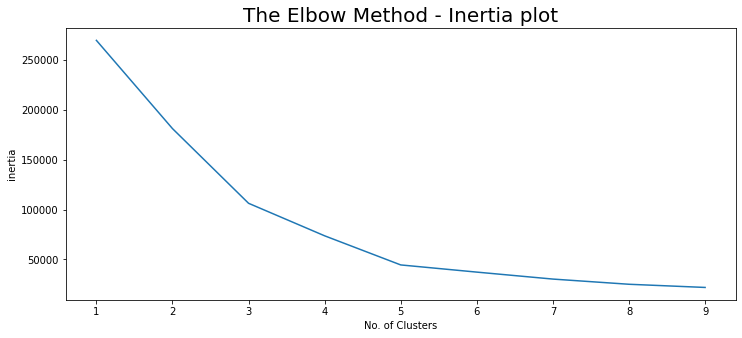

In [ ]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()